# Data analyst Nanodegree, Project 1

**Author:** Mat Leonard

Here, I'm going to analysis data from an experiment on the [Stroop effect](https://en.wikipedia.org/wiki/Stroop_effect). This is for my work on [Udacity's Data Analyst Nanodegree](https://www.udacity.com/course/data-analyst-nanodegree--nd002), Project 1: Test a Perceptual Phenomenon.

Now, import the data.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb

In [2]:
df = pd.read_csv('stroopdata.csv')
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


The data is shown above. Pretty cool stuff. Here, our independent variable is the condition, congruent or incongruent words. The dependent variable is the performance time.

I'll create some histograms to view the distributions and then calculate some descriptive statistics.

## Looking at the distribution of performances

Now I'm going to look at the performance distributions to get a sense of the data. I'll make histograms of each group, plot them on the same figure.

In [3]:
sb.set_context('notebook', font_scale=1.25)

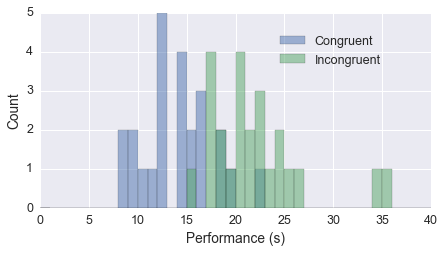

In [7]:
fig, ax = plt.subplots(figsize=(7,3.5))
#colors = {'Congruent':'steelblue', 'Incongruent':'orangered'}
for col in df:
    ax.hist(df[col], range=(0,40), bins=40, alpha=0.5)
ax.set_xlabel('Performance (s)')
ax.set_ylabel('Count')
_ = ax.legend(loc=(0.6,0.7), frameon=False)

Looks like the subjects perform quicker for congruent words than for incongruent words. Then, I'll calculate the mean, standard deviation, and median for the performances. 

In [5]:
df.describe().ix[['mean', 'std', '50%']]

,Congruent,Incongruent
mean,14.051125,22.015917
std,3.559358,4.797057
50%,14.356500,21.017500


The mean performance for the congruent words is roughly 6 seconds faster than for incongruent words. The standard deviation for congruent words is smaller too, but this difference is likely caused by the two incongruent outliers around 35 seconds.

I also want to look at the differences in performance for each subject. 

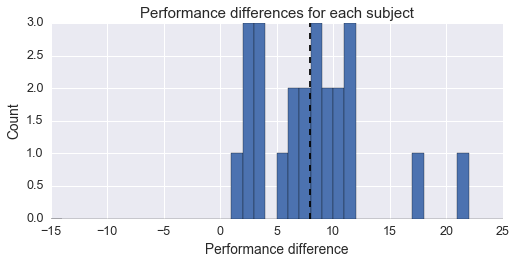

In [6]:
fig, ax = plt.subplots(figsize=(7, 3.5))
diffs = pd.Series(np.diff(df.values, axis=1).flatten())
_ = ax.hist(diffs, range=(-15,25), bins=40)
ax.vlines(diffs.mean(), *ax.get_ylim(), linestyle='--')
ax.set_xlabel("Performance difference")
ax.set_ylabel("Count")
ax.set_title("Performance differences for each subject")
fig.tight_layout(pad=0.1)

In [92]:
# Differences statistics
diffs.describe()

count    24.000000
mean      7.964792
std       4.864827
min       1.950000
25%       3.645500
50%       7.666500
75%      10.258500
max      21.919000
dtype: float64

## Is there a likely effect on performance between the conditions?

Here each subject is tested under both conditions, congruent and incongruent words. I'm interested in the performance difference of each subject. You can see the distribution of the differences above. Are these differences due to natural variation? We can answer this with a paired t-test since our two conditions are dependent (same subject tested in both conditions).

Here the null hypothesis is that the means are equal, $\mu_I = \mu_C$. The alternative hypothesis is that the performance times are larger for the incongruent condition, $\mu_I > \mu_C$. We calculate the t-statistic from the differences. The degress of freedom are the number of subjects minus 1. With this test, we assume that the performances on each condition, as well as the performance differences, are normally distributed.

First I'll calculate the t-statistic:

$$
t = \frac{\overline{d}}{\sqrt{SE(\overline{d})}}
$$

where $\overline{d}$ is the mean of the differences and $SE(\overline{d})$ is the standard error of the mean.

In [9]:
stderr = diffs.std()/np.sqrt(diffs.size)
tstat = diffs.mean()/stderr
print("t-statistic = {}".format(tstat))

t-statistic = 8.020706944109957


The t-statistic follows a t-distribution with degrees of freedom $N - 1$, so:

In [16]:
# degrees of freedom
dfree = diffs.size - 1
print("degress of freedom = {}".format(dfree))

degress of freedom = 23


Now I'll plot the t-statistic from the data against the t-distribution:

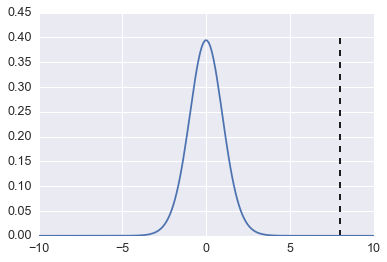

In [17]:
x = np.linspace(-10,10,num=200)
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, sp.stats.t.pdf(x, loc=0, df=dfree))
ax.vlines(tstat, 0, ax.get_ylim()[1], linestyle='--')

The p-value can easily be calculated from the cumulative density function, in this case $ p = 1 - \mathrm{cdf}(t) $ for the one-sided p-value.

In [14]:
p = 1 - sp.stats.t.cdf(tstat, df=dfree)
print("Two-tailed p-value: {:.3e}".format(p))

Two-tailed p-value: 2.052e-08


The p-value is well below $0.05$ here, so I should reject the null hypothesis. I conclude that performance on congruent words is likely faster than performance on incongruent words. This matches my intuition, because I can certainly feel myself reading the incongruent words slower.

I imagine this effect exists because our brains are better at reading words, something we do all the time, than naming colors. We have to inhibit our inclination to read the words and instead name the color, leading to longer processing times for the incongruent condition.